In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA



In [2]:
path = 'C:\\Users\\EyalK\\Desktop\\ML2\\Data ML2.csv'   ## לבודק:שים את הנתיב המתאים לדאטה מהמחשב שלך
df = pd.read_csv(path)

In [3]:
print(df.shape)
df.head()

(8210, 20)


,ID,חברה,מס' אתר,עיר,כתובת האתר,רשות מקומית,תחום שיפוט,X_ITM,Y_ITM,סוג אתר,תאריך היתר הקמה,תאריך היתר הפעלה,בדיקה תקופתית אחרונה,היתר קרינה,עוצמה מרבית תיאורטית בµW לסמר,העוצמה ביחס לסף הבריאותי [%],תאור נקודה בה התקבלה תוצאה מירבית,קובץ הקמה,קובץ הפעלה,טכנולוגיית שידור
0,1,סלקום,232,בית יצחק-שער חפר,ליד בריכת ייבוש,עמק חפר,עמק חפר,188906,693494,תורן קרקעי,23/12/2020,31/12/2023,17/08/2023,יש היתר,1.324,0.283,במבנה חד קומתי קרקע,http://documents.sviva.gov.il/B001_2_232_20201...,http://documents.sviva.gov.il/B002_2_232_20231...,דור 2 3 4 5
1,2,סלקום,233,ירושלים,ישיבת הכותל,ירושלים,ירושלים,222159,631391,אנטנת עוקץ,27/07/2020,25/12/2023,28/07/2024,יש היתר,55.916,7.072,במבנה קומה 3,http://documents.sviva.gov.il/B001_2_233_20200...,http://documents.sviva.gov.il/B002_2_233_20231...,דור 2 3 4
2,3,סלקום,234,ירושלים,מלון הר ציון-דרך חברון 15 י-ם,ירושלים,ירושלים,221512,630730,תורן על הגג,17/01/2022,22/08/2023,07/07/2024,יש היתר,44.540,5.781,במבנה קומה 3,http://documents.sviva.gov.il/B001_2_234_20220...,http://documents.sviva.gov.il/B002_2_234_20230...,דור 2 3 4 5
3,4,סלקום,235,ירושלים,רח` אלפסי 19 ירושלים,ירושלים,ירושלים,220226,631104,תורן על הגג,29/05/2023,25/12/2023,29/05/2024,יש היתר,61.640,7.700,אלפסי 12,http://documents.sviva.gov.il/B001_2_235_20230...,http://documents.sviva.gov.il/B002_2_235_20231...,דור 2 3 4
4,5,סלקום,236,ירושלים,בית הדואר-סאלח א-דין,ירושלים,ירושלים,222216,632340,אנטנת עוקץ,14/09/2022,24/12/2023,01/09/2024,יש היתר,67.600,7.750,בניין מגורים,http://documents.sviva.gov.il/B001_2_236_20220...,http://documents.sviva.gov.il/B002_2_236_20231...,דור 2 3 4 5


## cleaning and preparing the data


In [4]:
# renaming the columns
df.rename(columns={'סוג אתר': 'site_type',
                   'עיר': 'city',
                   'טכנולוגיית שידור': 'transmission_technologies',
                   'עוצמה מרבית תיאורטית בµW לסמר': 'Maximum_theoretical_radiation_intensity',
                   'העוצמה ביחס לסף הבריאותי [%]':'related_intensity',
                   'היתר קרינה': 'radiation_approval_status',
                   },
           inplace=True)

#selecting specific columns
selected_columns = ['site_type', 'city', 'X_ITM', 'Y_ITM','transmission_technologies', 'Maximum_theoretical_radiation_intensity', 'related_intensity', 'radiation_approval_status']
df = df[selected_columns]

df.head()

,site_type,city,X_ITM,Y_ITM,transmission_technologies,Maximum_theoretical_radiation_intensity,related_intensity,radiation_approval_status
0,תורן קרקעי,בית יצחק-שער חפר,188906,693494,דור 2 3 4 5,1.324,0.283,יש היתר
1,אנטנת עוקץ,ירושלים,222159,631391,דור 2 3 4,55.916,7.072,יש היתר
2,תורן על הגג,ירושלים,221512,630730,דור 2 3 4 5,44.540,5.781,יש היתר
3,תורן על הגג,ירושלים,220226,631104,דור 2 3 4,61.640,7.700,יש היתר
4,אנטנת עוקץ,ירושלים,222216,632340,דור 2 3 4 5,67.600,7.750,יש היתר


In [5]:
# Check if Null values exist in the dataframe.
column_nan_count = df.isnull().sum()
print("NaN count per column:")
print(column_nan_count)

NaN count per column:
site_type                                  0
city                                       0
X_ITM                                      0
Y_ITM                                      0
transmission_technologies                  0
Maximum_theoretical_radiation_intensity    0
related_intensity                          0
radiation_approval_status                  0
dtype: int64


## Part 1 of the project. Supervised classification problem, compare 5 models to predict the site_type column.

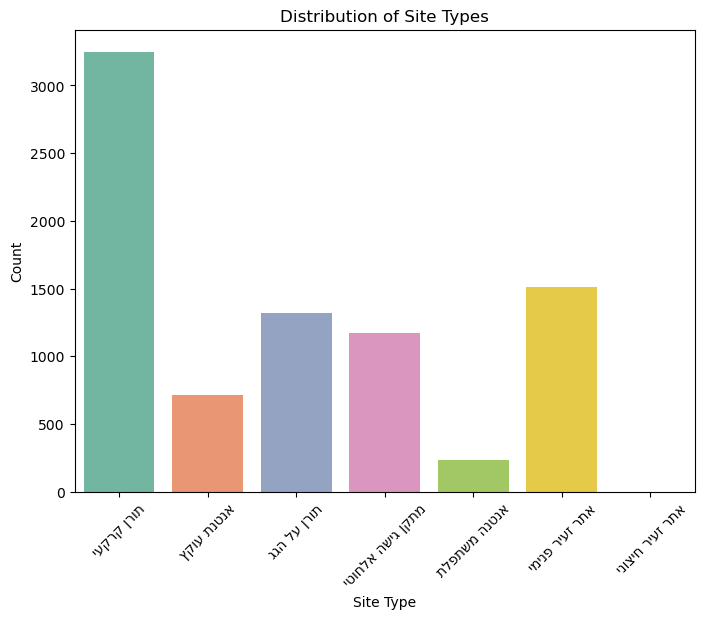

<Figure size 640x480 with 0 Axes>

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='site_type', palette='Set2')
plt.title('Distribution of Site Types')
plt.xlabel('Site Type')
plt.ylabel('Count')

labels = plt.gca().get_xticklabels()
reversed_labels = [label.get_text()[::-1] for label in labels]
plt.gca().set_xticklabels(reversed_labels)

plt.xticks(rotation=45)
plt.show()

plt.savefig('C:\\Users\\EyalK\\Desktop\\ML2\\site_types_histogram.png')

In [7]:
# The first step is to prepare the data for training.

X = df.drop(columns=['site_type'])
y = df['site_type']

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Separate between categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

In [8]:
# Define models to compare
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [10]:
# This code was written using help from generative AI.
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train and evaluate each model
for model_name, model in models.items():
    classifier = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # Map predictions and actual labels back to original values
    y_pred_labels = label_encoder.inverse_transform(y_pred)
    y_test_labels = label_encoder.inverse_transform(y_test)

    print(f"\nModel: {model_name}")
    print(classification_report(y_test_labels, y_pred_labels))


Model: Decision Tree
                  precision    recall  f1-score   support

    אנטנה משתפלת       0.05      0.05      0.05        41
      אנטנת עוקץ       0.22      0.19      0.20       140
 אתר זעיר חיצוני       0.00      0.00      0.00         1
  אתר זעיר פנימי       0.78      0.80      0.79       296
מתקן גישה אלחוטי       0.49      0.51      0.50       239
     תורן על הגג       0.35      0.39      0.37       245
      תורן קרקעי       0.80      0.76      0.78       680

        accuracy                           0.61      1642
       macro avg       0.38      0.39      0.38      1642
    weighted avg       0.61      0.61      0.61      1642



C:\Users\EyalK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\EyalK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\EyalK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Model: Random Forest
                  precision    recall  f1-score   support

    אנטנה משתפלת       0.00      0.00      0.00        41
      אנטנת עוקץ       0.32      0.19      0.24       140
 אתר זעיר חיצוני       0.00      0.00      0.00         1
  אתר זעיר פנימי       0.78      0.90      0.83       296
מתקן גישה אלחוטי       0.61      0.66      0.63       239
     תורן על הגג       0.46      0.45      0.46       245
      תורן קרקעי       0.81      0.85      0.83       680

        accuracy                           0.69      1642
       macro avg       0.43      0.43      0.43      1642
    weighted avg       0.66      0.69      0.68      1642



C:\Users\EyalK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\EyalK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\EyalK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Model: Logistic Regression
                  precision    recall  f1-score   support

    אנטנה משתפלת       0.00      0.00      0.00        41
      אנטנת עוקץ       0.32      0.09      0.14       140
 אתר זעיר חיצוני       0.00      0.00      0.00         1
  אתר זעיר פנימי       0.69      0.83      0.76       296
מתקן גישה אלחוטי       0.59      0.63      0.61       239
     תורן על הגג       0.51      0.47      0.49       245
      תורן קרקעי       0.78      0.88      0.82       680

        accuracy                           0.68      1642
       macro avg       0.41      0.41      0.40      1642
    weighted avg       0.64      0.68      0.65      1642



C:\Users\EyalK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\EyalK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\EyalK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Model: Support Vector Machine
                  precision    recall  f1-score   support

    אנטנה משתפלת       0.00      0.00      0.00        41
      אנטנת עוקץ       0.45      0.13      0.20       140
 אתר זעיר חיצוני       0.00      0.00      0.00         1
  אתר זעיר פנימי       0.70      0.83      0.76       296
מתקן גישה אלחוטי       0.53      0.65      0.58       239
     תורן על הגג       0.50      0.45      0.47       245
      תורן קרקעי       0.80      0.86      0.83       680

        accuracy                           0.68      1642
       macro avg       0.43      0.42      0.41      1642
    weighted avg       0.65      0.68      0.65      1642



C:\Users\EyalK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\EyalK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\EyalK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Model: K-Nearest Neighbors
                  precision    recall  f1-score   support

    אנטנה משתפלת       0.03      0.02      0.03        41
      אנטנת עוקץ       0.27      0.25      0.26       140
 אתר זעיר חיצוני       0.00      0.00      0.00         1
  אתר זעיר פנימי       0.68      0.83      0.75       296
מתקן גישה אלחוטי       0.49      0.51      0.50       239
     תורן על הגג       0.41      0.40      0.41       245
      תורן קרקעי       0.84      0.78      0.81       680

        accuracy                           0.63      1642
       macro avg       0.39      0.40      0.39      1642
    weighted avg       0.63      0.63      0.63      1642



C:\Users\EyalK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\EyalK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\EyalK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
# Define models and hyperparameter grids to compare
param_grids = {
    'Decision Tree': {
        'classifier__max_depth': [5, 10, 20, None],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [5, 10, 20, None]
    },
    'Logistic Regression': {
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__solver': ['lbfgs', 'liblinear']
    },
    'Support Vector Machine': {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__kernel': ['linear', 'rbf', 'poly']
    },
    'K-Nearest Neighbors': {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance']
    }
}

# Train and evaluate each model with Grid Search
for model_name, model in models.items():
    classifier = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    grid_search = GridSearchCV(estimator=classifier,
                               param_grid=param_grids[model_name],
                               cv=5,
                               scoring='accuracy',
                               n_jobs=-1)

    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)

    # Map predictions and actual labels back to original values
    y_pred_labels = label_encoder.inverse_transform(y_pred)
    y_test_labels = label_encoder.inverse_transform(y_test)

    print(f"\nModel: {model_name}")
    print("Best Parameters:", grid_search.best_params_)
    print(classification_report(y_test_labels, y_pred_labels))

C:\Users\EyalK\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Model: Decision Tree
Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 10}
                  precision    recall  f1-score   support

    אנטנה משתפלת       0.09      0.02      0.04        41
      אנטנת עוקץ       0.14      0.03      0.05       140
 אתר זעיר חיצוני       0.00      0.00      0.00         1
  אתר זעיר פנימי       0.74      0.85      0.79       296
מתקן גישה אלחוטי       0.54      0.57      0.56       239
     תורן על הגג       0.45      0.55      0.49       245
      תורן קרקעי       0.80      0.84      0.82       680

        accuracy                           0.67      1642
       macro avg       0.39      0.41      0.39      1642
    weighted avg       0.63      0.67      0.64      1642



C:\Users\EyalK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\EyalK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\EyalK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\EyalK\anaconda3\Lib\site-packag


Model: Random Forest
Best Parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 200}
                  precision    recall  f1-score   support

    אנטנה משתפלת       0.00      0.00      0.00        41
      אנטנת עוקץ       0.34      0.21      0.26       140
 אתר זעיר חיצוני       0.00      0.00      0.00         1
  אתר זעיר פנימי       0.77      0.89      0.83       296
מתקן גישה אלחוטי       0.61      0.64      0.63       239
     תורן על הגג       0.47      0.46      0.46       245
      תורן קרקעי       0.82      0.86      0.84       680

        accuracy                           0.70      1642
       macro avg       0.43      0.44      0.43      1642
    weighted avg       0.67      0.70      0.68      1642



C:\Users\EyalK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\EyalK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\EyalK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\EyalK\anaconda3\Lib\site-packag


Model: Logistic Regression
Best Parameters: {'classifier__C': 1, 'classifier__solver': 'lbfgs'}
                  precision    recall  f1-score   support

    אנטנה משתפלת       0.00      0.00      0.00        41
      אנטנת עוקץ       0.32      0.09      0.14       140
 אתר זעיר חיצוני       0.00      0.00      0.00         1
  אתר זעיר פנימי       0.69      0.83      0.76       296
מתקן גישה אלחוטי       0.59      0.63      0.61       239
     תורן על הגג       0.51      0.47      0.49       245
      תורן קרקעי       0.78      0.88      0.82       680

        accuracy                           0.68      1642
       macro avg       0.41      0.41      0.40      1642
    weighted avg       0.64      0.68      0.65      1642



C:\Users\EyalK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\EyalK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\EyalK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\EyalK\anaconda3\Lib\site-packag


Model: Support Vector Machine
Best Parameters: {'classifier__C': 1, 'classifier__kernel': 'rbf'}
                  precision    recall  f1-score   support

    אנטנה משתפלת       0.00      0.00      0.00        41
      אנטנת עוקץ       0.45      0.13      0.20       140
 אתר זעיר חיצוני       0.00      0.00      0.00         1
  אתר זעיר פנימי       0.70      0.83      0.76       296
מתקן גישה אלחוטי       0.53      0.65      0.58       239
     תורן על הגג       0.50      0.45      0.47       245
      תורן קרקעי       0.80      0.86      0.83       680

        accuracy                           0.68      1642
       macro avg       0.43      0.42      0.41      1642
    weighted avg       0.65      0.68      0.65      1642



C:\Users\EyalK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\EyalK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\EyalK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\EyalK\anaconda3\Lib\site-packag


Model: K-Nearest Neighbors
Best Parameters: {'classifier__n_neighbors': 9, 'classifier__weights': 'distance'}
                  precision    recall  f1-score   support

    אנטנה משתפלת       0.00      0.00      0.00        41
      אנטנת עוקץ       0.27      0.16      0.20       140
 אתר זעיר חיצוני       0.00      0.00      0.00         1
  אתר זעיר פנימי       0.72      0.86      0.78       296
מתקן גישה אלחוטי       0.53      0.55      0.54       239
     תורן על הגג       0.41      0.46      0.43       245
      תורן קרקעי       0.82      0.80      0.81       680

        accuracy                           0.65      1642
       macro avg       0.39      0.41      0.40      1642
    weighted avg       0.63      0.65      0.64      1642



C:\Users\EyalK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\EyalK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\EyalK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Part 2 - unsipervised learning

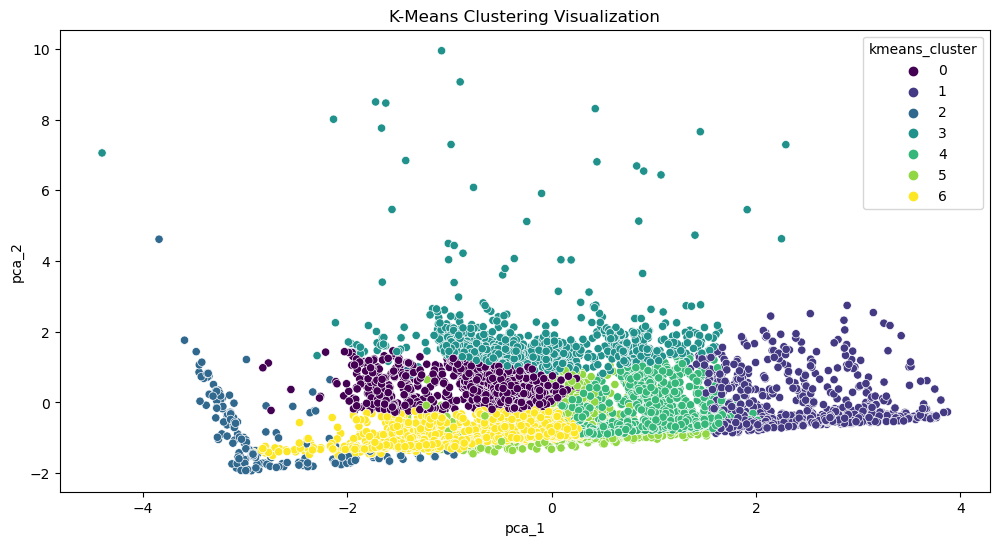

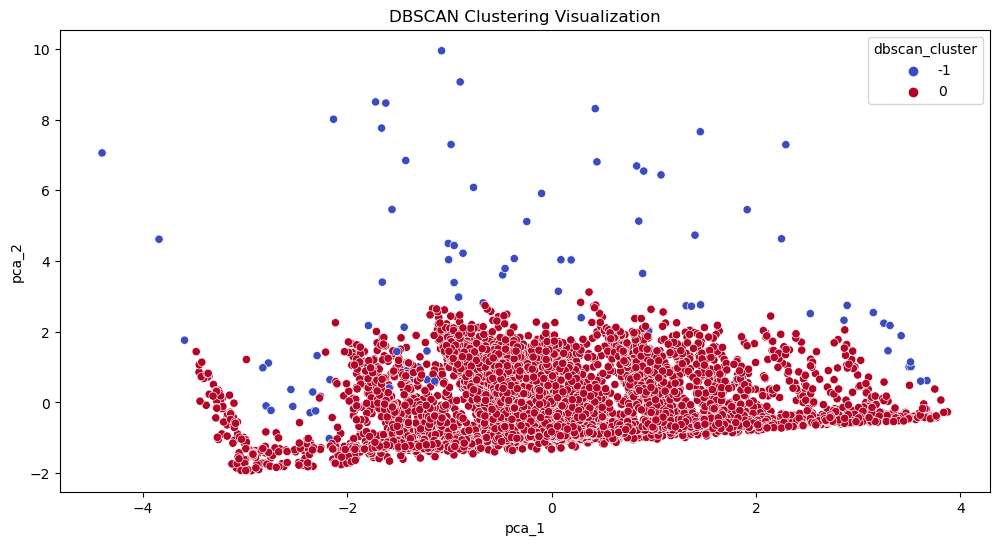

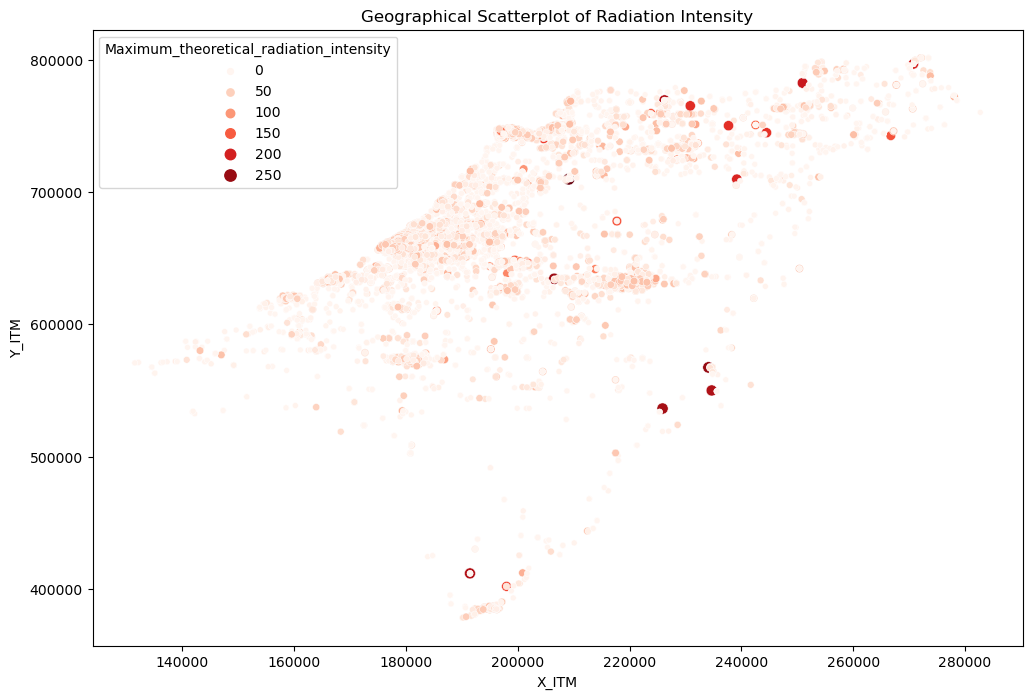

High-radiation anomalies:
             site_type       city   X_ITM   Y_ITM  \
4           אנטנת עוקץ    ירושלים  222216  632340   
7     מתקן גישה אלחוטי      טייבה  200272  685428   
12          אנטנת עוקץ     הרצליה  186266  675049   
13         תורן על הגג  רמת השרון  185019  672863   
17          אנטנת עוקץ    ירושלים  219207  633001   
...                ...        ...     ...     ...   
7948       תורן על הגג       חיפה  203884  742555   
8048       תורן על הגג    כפר סבא  190652  676015   
8052       תורן על הגג    כפר סבא  193442  676102   
8092        תורן קרקעי       חיפה  197005  745984   
8097        אנטנת עוקץ       חיפה  199944  745535   

      Maximum_theoretical_radiation_intensity  
4                                      67.600  
7                                      67.540  
12                                     74.080  
13                                     69.080  
17                                     68.050  
...                                       ...  
7

In [13]:
# This part was written with the help of generative AI.

features = df[['Maximum_theoretical_radiation_intensity', 'X_ITM', 'Y_ITM']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# K-Means
kmeans = KMeans(n_clusters=7, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(scaled_features)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)
df['dbscan_cluster'] = dbscan.fit_predict(scaled_features)

# PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
df['pca_1'] = principal_components[:, 0]
df['pca_2'] = principal_components[:, 1]

# Visualization of K-Means clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='pca_1', y='pca_2', hue='kmeans_cluster', data=df, palette='viridis')
plt.title('K-Means Clustering Visualization')
plt.show()

#plt.savefig('C:\\Users\\EyalK\\Desktop\\ML2\\kmeans_clusters.png')

# Visualization of DBSCAN clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='pca_1', y='pca_2', hue='dbscan_cluster', data=df, palette='coolwarm')
plt.title('DBSCAN Clustering Visualization')
plt.show()

#plt.savefig('C:\\Users\\EyalK\\Desktop\\ML2\\DBSCAN.png')

# Geographical scatterplot visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(x='X_ITM', y='Y_ITM', hue='Maximum_theoretical_radiation_intensity', size='Maximum_theoretical_radiation_intensity', data=df, palette='Reds')
plt.title('Geographical Scatterplot of Radiation Intensity')
plt.show()

#plt.savefig('C:\\Users\\EyalK\\Desktop\\ML2\\Geographical_scatterplot.png')

# Investigate high-radiation anomalies
threshold = df['Maximum_theoretical_radiation_intensity'].quantile(0.95)
anomalies = df[df['Maximum_theoretical_radiation_intensity'] > threshold]
print("High-radiation anomalies:")
print(anomalies[['site_type', 'city', 'X_ITM', 'Y_ITM', 'Maximum_theoretical_radiation_intensity']])

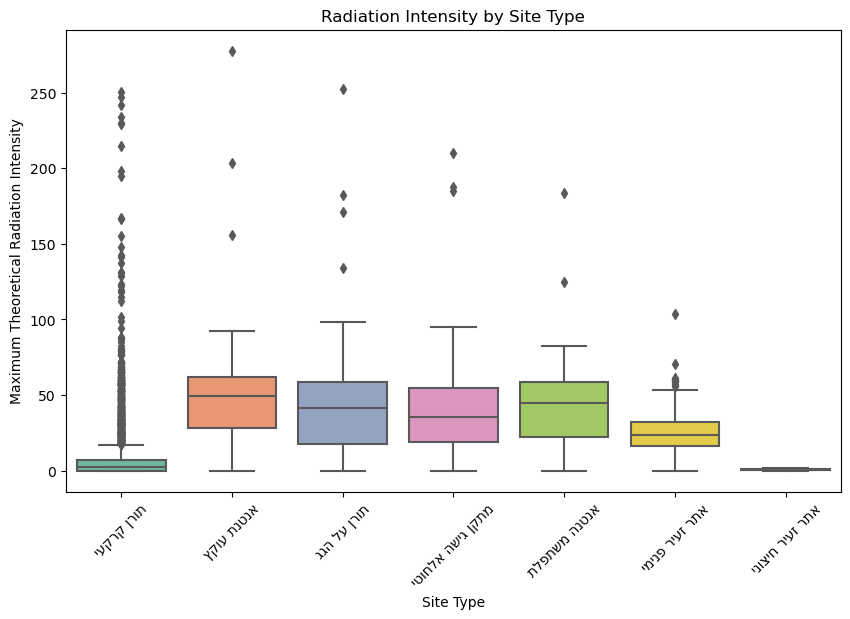

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='site_type', y='Maximum_theoretical_radiation_intensity', palette='Set2')
plt.title('Radiation Intensity by Site Type')
plt.xlabel('Site Type')
plt.ylabel('Maximum Theoretical Radiation Intensity')

labels = plt.gca().get_xticklabels()
reversed_labels = [label.get_text()[::-1] for label in labels]
plt.gca().set_xticklabels(reversed_labels)

#plt.savefig('C:\\Users\\EyalK\\Desktop\\ML2\\Radiation intensity by site type.png')

plt.xticks(rotation=45)
plt.show()

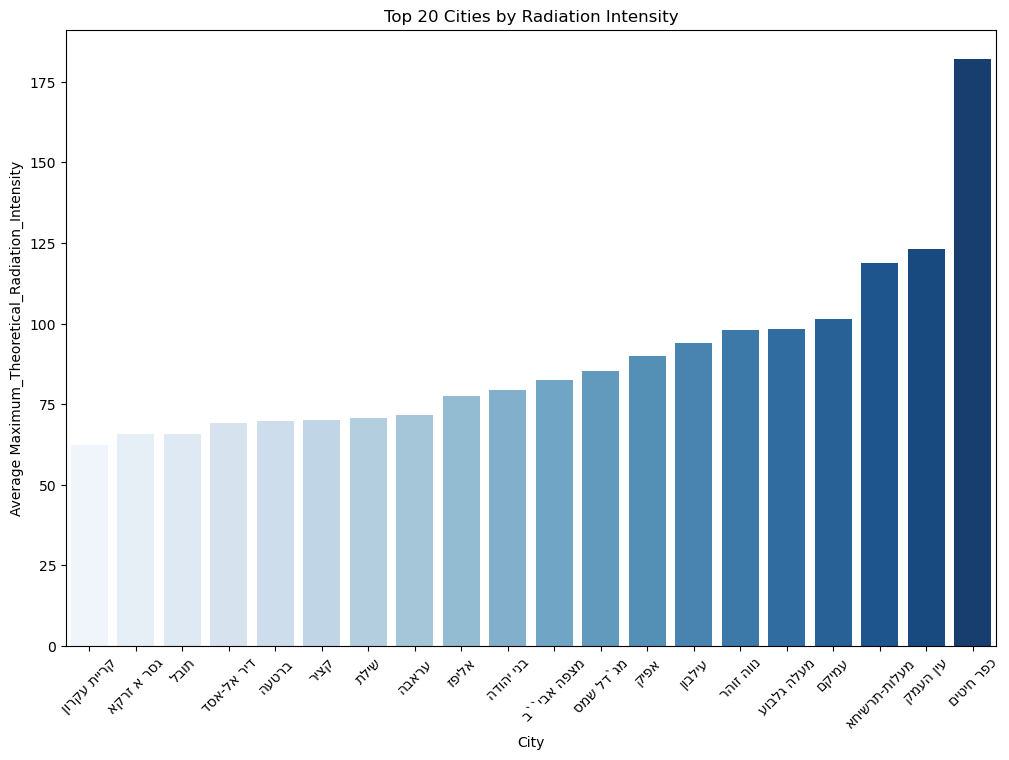

In [19]:
city_mean_intensity = df.groupby('city')['Maximum_theoretical_radiation_intensity'].mean().sort_values()

top_20 = city_mean_intensity.tail(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_20.index, y=top_20.values, palette='Blues')
plt.title('Top 20 Cities by Radiation Intensity')
plt.xlabel('City')
plt.ylabel('Average Maximum_Theoretical_Radiation_Intensity')

labels = plt.gca().get_xticklabels()
reversed_labels = [label.get_text()[::-1] for label in labels]
plt.gca().set_xticklabels(reversed_labels)

plt.xticks(rotation=45)
plt.savefig('C:\\Users\\EyalK\\Desktop\\ML2\\top_20_radiation_cities.png')
plt.show()
